### 连接mongodb

In [1]:
# 使用PyMongo 库里面的 MongoClient
import pymongo
client = pymongo.MongoClient(host="localhost", port=27017) 



### 指定数据库

In [2]:
# 两种方法使用test数据库
# 1.
db = client.test
# 2.
db2 = client['test']


### 指定集合

In [4]:
# 指定db.test.demo 集合
collection = db.demo
collection = db['demo']

### 插入数据
`collection.insert_one(DICT)`  
`collection.insert_many([DICT1, DICT2...])`

In [72]:
student = {
    'id': 20170101,
    'name':'aiaoming',
    'age':100,
    'gender':'female'
}

# 相当于db.demo.insert(student)
result = collection.insert_one(student)
print(result)

In [62]:
# 插入多条数据
student1 = {
    'id': 20170101,
    'name':'xiaogang',
    'age':10,
    'gender':'female'
}

student2 = {
    'id':2019292,
    'name':'mikejson',
    'age': 48
}

result = collection.insert_many([student1, student2])
print(result)

### 查询
`collection.find_one(<query>)`  
`collection.find(<query>)`

In [41]:
result = collection.find_one({"name":'xiaoming'})
print(type(result))
print(result)

print('-'*50)
# --------------
# 如果要根据objectId进行查询的话，可以进行如下操作
from bson.objectid import ObjectId
result = collection.find_one({'_id':ObjectId('5d8725cdf3bb8d9719e0c6be')})
print(result)



result = collection.find({'name':'xiaoming'})
print(result) # 返回一个Cursor类型的对象， 相当于一个生成器
print(list(result))

<class 'dict'>
{'_id': ObjectId('5d8725cdf3bb8d9719e0c6be'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
--------------------------------------------------
{'_id': ObjectId('5d8725cdf3bb8d9719e0c6be'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
[{'_id': ObjectId('5d8725cdf3bb8d9719e0c6be'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}, {'_id': ObjectId('5d8725edf3bb8d9719e0c6bf'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}, {'_id': ObjectId('5d8725f5f3bb8d9719e0c6c0'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}, {'_id': ObjectId('5d8725f5f3bb8d9719e0c6c1'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}, {'_id': ObjectId('5d8726acf3bb8d9719e0c6c2'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}, {'_id': ObjectId('5d8726caf3bb8d9719e0c6c3'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}, {'_id': ObjectI

In [45]:
# 查询年龄大于20的
results = collection.find({'age':{'$gt':29}})
for result in results:
    print(result)

{'_id': ObjectId('5d8725cdf3bb8d9719e0c6be'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725edf3bb8d9719e0c6bf'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725f5f3bb8d9719e0c6c0'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725f5f3bb8d9719e0c6c1'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726acf3bb8d9719e0c6c2'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726caf3bb8d9719e0c6c3'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726d4f3bb8d9719e0c6c4'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726e2f3bb8d9719e0c6c5'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726f8f3bb8d9719e0c6c6'), 'id': 20170101, 'name': 'xiaoming', 'age':

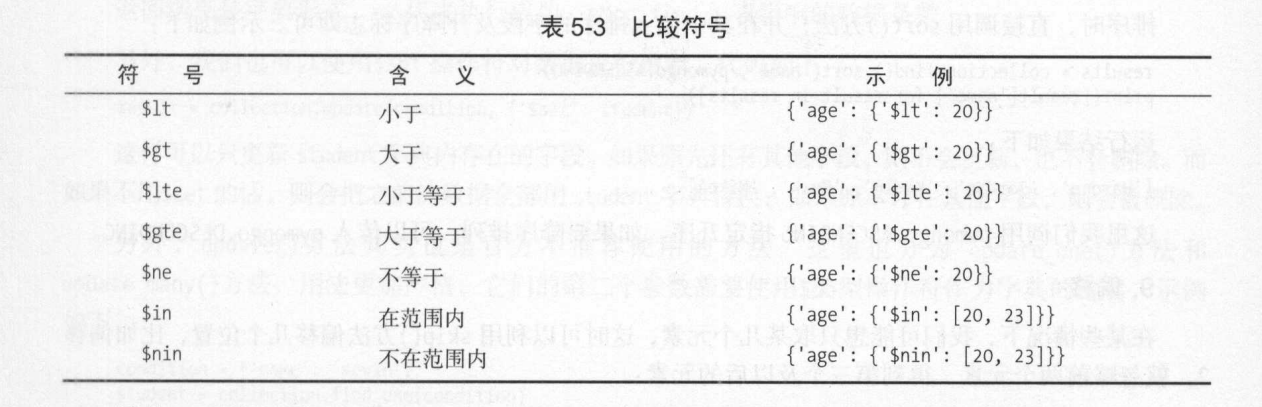

#### 用正则进行匹配


In [48]:
results  = collection.find({'name':{'$regex':'^m.*'}})
for ress in results:
    print(result)

{'_id': ObjectId('5d8726f8f3bb8d9719e0c6c6'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}


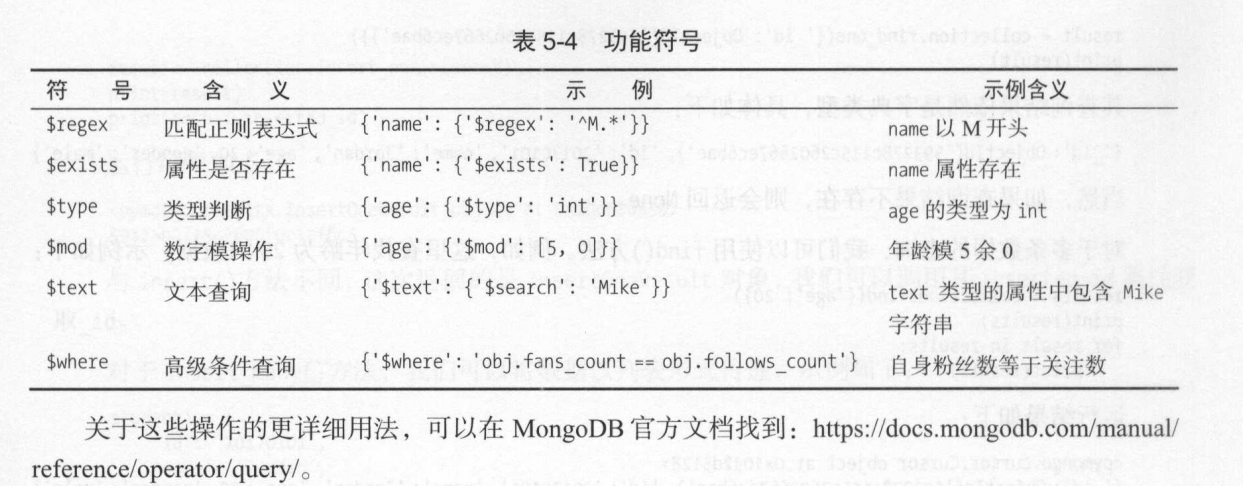

### 计数
`count = collection.count_documents({})`

In [56]:
count = collection.count_documents({})
print(count)

count = collection.count_documents({'name':'xiaoming'})
print(count)

count = collection.count_documents({'age':{'$lt':30}})
print(count)

18
9
1


### 排序
`collection.find(<query).sort([(), ()])`

In [75]:
results = collection.find({'name':{'$regex':'.*'}}).sort('age', -1)  # 1为升序， -1 为降序
for result in results:
    print(result)
    
results = collection.find({'name':{'$regex':'.*'}}).sort([('age',1), ('name',-1)])  # 1为升序， -1 为降序
for result in results:
    print(result)


{'_id': ObjectId('5d8725cdf3bb8d9719e0c6be'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725edf3bb8d9719e0c6bf'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725f5f3bb8d9719e0c6c0'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725f5f3bb8d9719e0c6c1'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726acf3bb8d9719e0c6c2'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726caf3bb8d9719e0c6c3'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726d4f3bb8d9719e0c6c4'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726e2f3bb8d9719e0c6c5'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726f8f3bb8d9719e0c6c6'), 'id': 20170101, 'name': 'xiaoming', 'age':

### 偏移
`collection.find().skip(n)`  
`collection.find().limit(n)`  
`collection.find().skip(n).limit(n)`


In [82]:
results = collection.find().skip(5)
for result in results:
    print(result)
    
# -----------
print('-'*50)
    
results = collection.find().limit(2)
for result in results:
    print(result)
    
# -----------
print('-'*50)
    
results = collection.find().skip(12).limit(2)
for result in results:
    print(result['name'])

{'_id': ObjectId('5d85c289b6f03421ea74275d'), 'country': 'china', 'province': 'bj', 'userid': 'da'}
{'_id': ObjectId('5d85c289b6f03421ea74275e'), 'country': 'china', 'province': 'bj', 'userid': 'fa'}
{'_id': ObjectId('5d85c40bb6f03421ea74275f'), 'country': 'usa', 'province': 'la', 'userid': 'jack'}
{'_id': ObjectId('5d8725cdf3bb8d9719e0c6be'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725edf3bb8d9719e0c6bf'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725f5f3bb8d9719e0c6c0'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8725f5f3bb8d9719e0c6c1'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726acf3bb8d9719e0c6c2'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId('5d8726caf3bb8d9719e0c6c3'), 'id': 20170101, 'name': 'xiaoming', 'age': 100, 'gender': 'female'}
{'_id': ObjectId

### 更新
`collection.update_one(<query>, {})`  
`collection.update_many(<query>, {})`

In [94]:
condition = {'name':'kevin'}
student = collection.find_one(condition)
print(student)
student['age'] = 25  # 修改学生信息，但还没更新
print(student)
result = collection.update(condition, {'name':'kevin'})  # 重写
print(result)

result = collection.update_one(condition, {"$set":{'friends':'kevin'}})  # 修改
print(result)




{'_id': ObjectId('5d873213f3bb8d9719e0c6cb'), 'name': 'kevin'}
{'_id': ObjectId('5d873213f3bb8d9719e0c6cb'), 'name': 'kevin', 'age': 25}
{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}


D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  


### 删除
`collection.remove(<query>)`  
`collection.delete_many(<query>)`  

`collection.delete_one(<query>)`

In [100]:
result = collection.remove({'name':'kevin'})
print(result)

result = collection.delete_one({"age":{"$gt":50}})
print(result)


result = collection.delete_many({"age":{"$gt":50}})
print(result)



{'n': 0, 'ok': 1.0}


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.
